<a href="https://colab.research.google.com/github/AnovaYoung/AI-System-for-Image-Restoration-and-Enhancement/blob/Data-Cleaning-and-Preparation/Preparation_for_Real_Esrgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPARE FOR SUPER-RESOLUTION AND REAL-ESRGAN MODEL

In [1]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the zip file in Google Drive
zip_file_path = "/content/drive/My Drive/perfectly_structured_dataset.zip"

# Directory
extraction_dir = "/content/perfectly_structured_dataset"

if os.path.exists(zip_file_path):
    print("Zip file found! Extracting...")

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_dir)
    print("Extraction complete!")

    print(f"Contents of extracted dataset directory: {os.listdir(extraction_dir)}")
else:
    print("Zip file not found. Please check the path.")


Mounted at /content/drive
Zip file found! Extracting...
Extraction complete!
Contents of extracted dataset directory: ['super_resolution_lr', 'tinynet_coco_combined', 'super_resolution_hr']


In [2]:
# Paths to the directories
hr_dir = "/content/perfectly_structured_dataset/super_resolution_hr"
lr_dir = "/content/perfectly_structured_dataset/super_resolution_lr"

# Function to verify directory contents
def verify_super_resolution_directories(hr_dir, lr_dir):
    hr_files = sorted(os.listdir(hr_dir))
    lr_files = sorted(os.listdir(lr_dir))

    # Count files
    print(f"Number of files in HR directory: {len(hr_files)}")
    print(f"Number of files in LR directory: {len(lr_files)}")

    # Verify matching pairs
    assert len(hr_files) == len(lr_files), "Mismatch in number of HR and LR files!"
    assert all(hr.replace("_hr", "_lr") == lr for hr, lr in zip(hr_files, lr_files)), "Filenames do not match between HR and LR!"

    print("\nSample HR files:", hr_files[:5])
    print("Sample LR files:", lr_files[:5])

verify_super_resolution_directories(hr_dir, lr_dir)


Number of files in HR directory: 58000
Number of files in LR directory: 58000

Sample HR files: ['img_00000_hr.png', 'img_00001_hr.png', 'img_00002_hr.png', 'img_00003_hr.png', 'img_00004_hr.png']
Sample LR files: ['img_00000_lr.png', 'img_00001_lr.png', 'img_00002_lr.png', 'img_00003_lr.png', 'img_00004_lr.png']


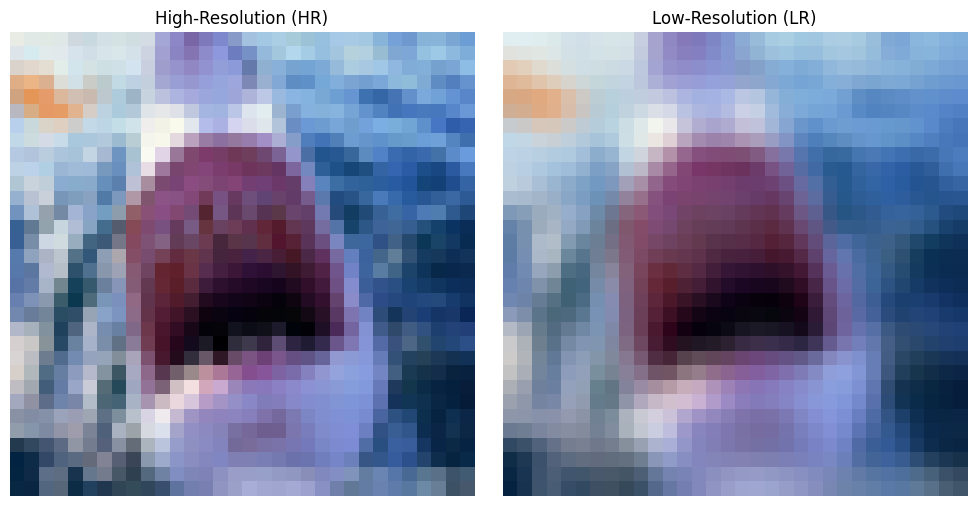

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

# sample images
sample_hr_path = os.path.join(hr_dir, 'img_00000_hr.png')
sample_lr_path = os.path.join(lr_dir, 'img_00000_lr.png')

# Load
hr_image = Image.open(sample_hr_path)
lr_image = Image.open(sample_lr_path)

# Display
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("High-Resolution (HR)")
plt.imshow(hr_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Low-Resolution (LR)")
plt.imshow(lr_image)
plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
hr_dir = "/content/perfectly_structured_dataset/super_resolution_hr"
lr_dir = "/content/perfectly_structured_dataset/super_resolution_lr"

# Check if directories have subfolders (e.g., train and test splits)
hr_subdirs = os.listdir(hr_dir)
lr_subdirs = os.listdir(lr_dir)

print(f"Subdirectories in HR directory: {hr_subdirs}")
print(f"Subdirectories in LR directory: {lr_subdirs}")

# If split directories exist, count the number of files in each
if 'train' in hr_subdirs and 'test' in hr_subdirs:
    train_hr_count = len(os.listdir(os.path.join(hr_dir, 'train')))
    test_hr_count = len(os.listdir(os.path.join(hr_dir, 'test')))
    train_lr_count = len(os.listdir(os.path.join(lr_dir, 'train')))
    test_lr_count = len(os.listdir(os.path.join(lr_dir, 'test')))

    print(f"Number of training HR files: {train_hr_count}")
    print(f"Number of testing HR files: {test_hr_count}")
    print(f"Number of training LR files: {train_lr_count}")
    print(f"Number of testing LR files: {test_lr_count}")
else:
    print("No train-test split found in the directories.")


Subdirectories in HR directory: ['img_39574_hr.png', 'img_30561_hr.png', 'img_15951_hr.png', 'img_54668_hr.png', 'img_31333_hr.png', 'img_31971_hr.png', 'img_06442_hr.png', 'img_50033_hr.png', 'img_41607_hr.png', 'img_23922_hr.png', 'img_44123_hr.png', 'img_14936_hr.png', 'img_23497_hr.png', 'img_00649_hr.png', 'img_29360_hr.png', 'img_27481_hr.png', 'img_25002_hr.png', 'img_56481_hr.png', 'img_24831_hr.png', 'img_28845_hr.png', 'img_55133_hr.png', 'img_22749_hr.png', 'img_25160_hr.png', 'img_20475_hr.png', 'img_07576_hr.png', 'img_47057_hr.png', 'img_28190_hr.png', 'img_18881_hr.png', 'img_32842_hr.png', 'img_27306_hr.png', 'img_45466_hr.png', 'img_22982_hr.png', 'img_02415_hr.png', 'img_59516_hr.png', 'img_55457_hr.png', 'img_09601_hr.png', 'img_59299_hr.png', 'img_24142_hr.png', 'img_54778_hr.png', 'img_15197_hr.png', 'img_30498_hr.png', 'img_34680_hr.png', 'img_30306_hr.png', 'img_11642_hr.png', 'img_01612_hr.png', 'img_24684_hr.png', 'img_54023_hr.png', 'img_21846_hr.png', 'img_55

# TRAIN-TEST, VAL SPLIT

**Before Train-Test-Validation Split**

1.  Verify Data Integrity

**What to do:** Check for corrupted or incomplete images in both HR and LR datasets.

**Why:** Corrupted data can cause training to fail or degrade model performance.
2. Normalize Image Sizes

**What to do:** Ensure all HR images have a consistent resolution (e.g., 256x256) and the corresponding LR images have the appropriate downscaled size (e.g., 64x64 if 4x downscaling).

**Why**: Models like Real-ESRGAN often expect uniform input-output sizes for batch processing and consistent downscaling factors.

3. Augment Dataset with Data Augmentation Techniques

**What to do**: Apply augmentations like random cropping, rotation, flipping, and brightness or contrast adjustments to HR and LR images simultaneously.

**Why**: Increases dataset diversity, helps the model generalize better, and reduces overfitting.

4. Analyze Dataset Bias

**What to do:** Examine the dataset for over-representation of specific patterns or objects.

**Why**: Ensures the model learns general super-resolution capabilities instead of focusing on specific biases in the dataset.

**1. Verify Data Integrity**

In [5]:
hr_dir = "/content/perfectly_structured_dataset/super_resolution_hr"
lr_dir = "/content/perfectly_structured_dataset/super_resolution_lr"

# Function to check for corrupted images
def verify_images(directory):
    corrupted_files = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        try:
            with Image.open(filepath) as img:
                img.verify()  # Verify integrity
        except Exception as e:
            corrupted_files.append(filepath)
    return corrupted_files

# Check HR and LR directories
corrupted_hr = verify_images(hr_dir)
corrupted_lr = verify_images(lr_dir)

print(f"Corrupted HR files: {len(corrupted_hr)}")
print(f"Corrupted LR files: {len(corrupted_lr)}")
if corrupted_hr:
    print(f"Sample Corrupted HR: {corrupted_hr[:5]}")
if corrupted_lr:
    print(f"Sample Corrupted LR: {corrupted_lr[:5]}")

Corrupted HR files: 0
Corrupted LR files: 0


**2. Normalize Image Sizes**

In [6]:
# Expected dimensions (HR and LR)
hr_size = (256, 256)
lr_size = (64, 64)  # Assuming a 4x downscaling factor

# Function to normalize image sizes
def resize_images(input_dir, output_dir, target_size):
    os.makedirs(output_dir, exist_ok=True)
    for filename in os.listdir(input_dir):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        try:
            with Image.open(input_path) as img:
                img_resized = img.resize(target_size, Image.BICUBIC)
                img_resized.save(output_path)
        except Exception as e:
            print(f"Error resizing {input_path}: {e}")

# Temporary output directories for resized images
normalized_hr_dir = "/content/perfectly_structured_dataset/normalized_super_resolution_hr"
normalized_lr_dir = "/content/perfectly_structured_dataset/normalized_super_resolution_lr"

# Resize HR and LR images
resize_images(hr_dir, normalized_hr_dir, hr_size)
resize_images(lr_dir, normalized_lr_dir, lr_size)

print("Image sizes normalized for HR and LR datasets.")


Image sizes normalized for HR and LR datasets.


3. Dataset Bias Analysis

HR Dataset - Mean: 0.4785, Std: 0.2150
LR Dataset - Mean: 0.4783, Std: 0.2034


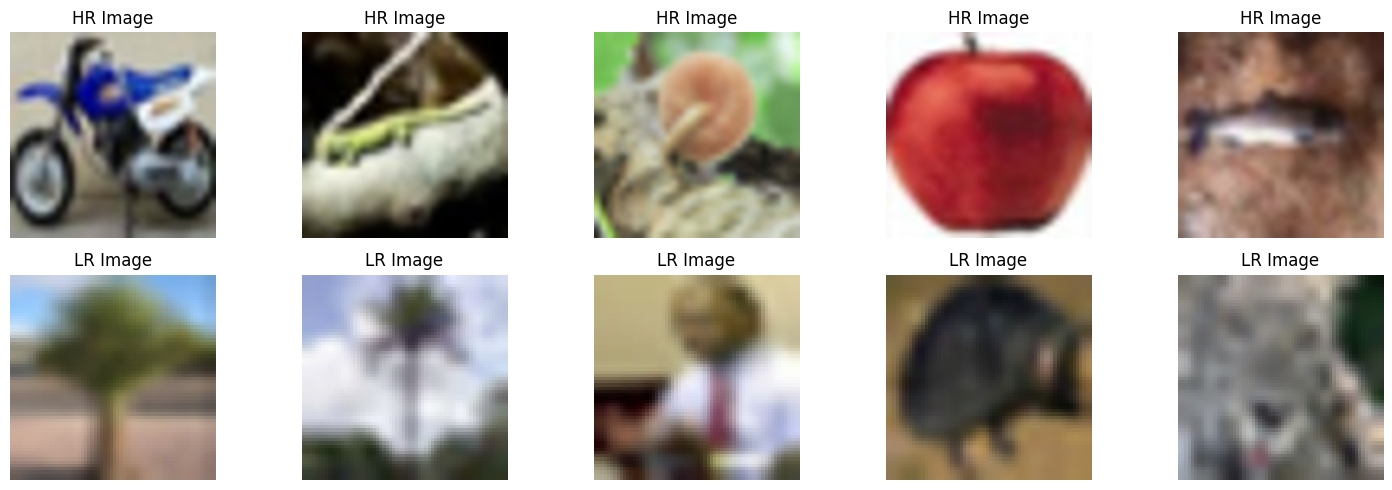

In [7]:
import numpy as np

hr_dir = "/content/perfectly_structured_dataset/normalized_super_resolution_hr"
lr_dir = "/content/perfectly_structured_dataset/normalized_super_resolution_lr"

# Helper function to calculate mean and std
def calculate_mean_std(image_dir):
    mean, std = 0, 0
    count = 0
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        img = np.array(Image.open(img_path)) / 255.0  # Normalize pixel values
        mean += img.mean()
        std += img.std()
        count += 1
    return mean / count, std / count

# HR Dataset analysis
hr_mean, hr_std = calculate_mean_std(hr_dir)
print(f"HR Dataset - Mean: {hr_mean:.4f}, Std: {hr_std:.4f}")

# LR Dataset analysis
lr_mean, lr_std = calculate_mean_std(lr_dir)
print(f"LR Dataset - Mean: {lr_mean:.4f}, Std: {lr_std:.4f}")

# Visualization of sample distributions
def visualize_sample_images(hr_dir, lr_dir, num_samples=5):
    hr_images = os.listdir(hr_dir)[:num_samples]
    lr_images = os.listdir(lr_dir)[:num_samples]

    fig, axs = plt.subplots(2, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        hr_path = os.path.join(hr_dir, hr_images[i])
        lr_path = os.path.join(lr_dir, lr_images[i])

        hr_img = Image.open(hr_path)
        lr_img = Image.open(lr_path)

        axs[0, i].imshow(hr_img)
        axs[0, i].axis('off')
        axs[0, i].set_title("HR Image")

        axs[1, i].imshow(lr_img)
        axs[1, i].axis('off')
        axs[1, i].set_title("LR Image")

    plt.tight_layout()
    plt.show()

# Visualize samples
visualize_sample_images(hr_dir, lr_dir)

Mean and Std Deviation: The similarity in mean and standard deviation values between HR and LR datasets suggests there are no significant biases in brightness or contrast between the two sets, which is excellent for training consistency.

# DATA AUGMENTATION

In [8]:
import cv2
from torchvision import transforms

hr_dir = "/content/perfectly_structured_dataset/normalized_super_resolution_hr"
lr_dir = "/content/perfectly_structured_dataset/normalized_super_resolution_lr"

# Output paths for augmented datasets
aug_hr_dir = "/content/perfectly_structured_dataset/augmented_super_resolution_hr"
aug_lr_dir = "/content/perfectly_structured_dataset/augmented_super_resolution_lr"
os.makedirs(aug_hr_dir, exist_ok=True)
os.makedirs(aug_lr_dir, exist_ok=True)

# Augmentation transformations
def augment_images(hr_img, lr_img):
    # Convert to PIL for torchvision compatibility
    hr_img = Image.fromarray(hr_img)
    lr_img = Image.fromarray(lr_img)

    # Define augmentations
    augmentation = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(15),  # Rotate within ±15 degrees
        transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Adjust brightness/contrast
        transforms.RandomResizedCrop(size=(128, 128), scale=(0.8, 1.0))  # Random crop to consistent size
    ])

    # Apply to both images
    hr_aug = augmentation(hr_img)
    lr_aug = augmentation(lr_img)

    # Convert back to numpy arrays
    return np.array(hr_aug), np.array(lr_aug)

# Process images and save augmented versions
hr_files = sorted(os.listdir(hr_dir))
lr_files = sorted(os.listdir(lr_dir))

for hr_file, lr_file in zip(hr_files, lr_files):
    hr_path = os.path.join(hr_dir, hr_file)
    lr_path = os.path.join(lr_dir, lr_file)

    # Load images
    hr_img = cv2.imread(hr_path)
    lr_img = cv2.imread(lr_path)

    # Apply augmentations
    hr_aug, lr_aug = augment_images(hr_img, lr_img)

    # Save augmented images
    cv2.imwrite(os.path.join(aug_hr_dir, hr_file), hr_aug)
    cv2.imwrite(os.path.join(aug_lr_dir, lr_file), lr_aug)

print(f"Augmented dataset saved to:\nHR: {aug_hr_dir}\nLR: {aug_lr_dir}")


Augmented dataset saved to:
HR: /content/perfectly_structured_dataset/augmented_super_resolution_hr
LR: /content/perfectly_structured_dataset/augmented_super_resolution_lr


# TRAIN-TEST-VALIDATION SPLIT

In [9]:
import shutil
from sklearn.model_selection import train_test_split

hr_path = "/content/perfectly_structured_dataset/augmented_super_resolution_hr"
lr_path = "/content/perfectly_structured_dataset/augmented_super_resolution_lr"

# Split datasets
split_base_path = "/content/perfectly_structured_dataset/augmented_split"
train_hr_path = os.path.join(split_base_path, "train", "super_resolution_hr")
train_lr_path = os.path.join(split_base_path, "train", "super_resolution_lr")
val_hr_path = os.path.join(split_base_path, "val", "super_resolution_hr")
val_lr_path = os.path.join(split_base_path, "val", "super_resolution_lr")
test_hr_path = os.path.join(split_base_path, "test", "super_resolution_hr")
test_lr_path = os.path.join(split_base_path, "test", "super_resolution_lr")

# Ensure directories exist
os.makedirs(train_hr_path, exist_ok=True)
os.makedirs(train_lr_path, exist_ok=True)
os.makedirs(val_hr_path, exist_ok=True)
os.makedirs(val_lr_path, exist_ok=True)
os.makedirs(test_hr_path, exist_ok=True)
os.makedirs(test_lr_path, exist_ok=True)

# Get sorted lists of HR and LR files
hr_files = sorted(os.listdir(hr_path))
lr_files = sorted(os.listdir(lr_path))

# Ensure matching HR and LR file counts
assert len(hr_files) == len(lr_files), "EXCUSE ME! There is a mismatch between HR and LR file counts!"

# Perform train-test-validation split
train_hr, temp_hr, train_lr, temp_lr = train_test_split(hr_files, lr_files, test_size=0.2, random_state=42)
val_hr, test_hr, val_lr, test_lr = train_test_split(temp_hr, temp_lr, test_size=0.5, random_state=42)

# Helper function to move files
def move_files(files, source_dir, target_dir):
    for file in files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(target_dir, file))

# Move files into respective directories
move_files(train_hr, hr_path, train_hr_path)
move_files(train_lr, lr_path, train_lr_path)
move_files(val_hr, hr_path, val_hr_path)
move_files(val_lr, lr_path, val_lr_path)
move_files(test_hr, hr_path, test_hr_path)
move_files(test_lr, lr_path, test_lr_path)

print(f"Train: {len(train_hr)} pairs")
print(f"Validation: {len(val_hr)} pairs")
print(f"Test: {len(test_hr)} pairs")


Train: 46400 pairs
Validation: 5800 pairs
Test: 5800 pairs


In [10]:
split_base_path = "/content/perfectly_structured_dataset/augmented_split"
split_paths = {
    "train": {
        "hr": os.path.join(split_base_path, "train", "super_resolution_hr"),
        "lr": os.path.join(split_base_path, "train", "super_resolution_lr")
    },
    "val": {
        "hr": os.path.join(split_base_path, "val", "super_resolution_hr"),
        "lr": os.path.join(split_base_path, "val", "super_resolution_lr")
    },
    "test": {
        "hr": os.path.join(split_base_path, "test", "super_resolution_hr"),
        "lr": os.path.join(split_base_path, "test", "super_resolution_lr")
    }
}

# Function to verify matching pairs
def verify_pairs(hr_dir, lr_dir):
    hr_files = sorted(os.listdir(hr_dir))
    lr_files = sorted(os.listdir(lr_dir))
    assert len(hr_files) == len(lr_files), f"Mismatch: {len(hr_files)} HR vs {len(lr_files)} LR"
    assert all(hr.replace("_hr", "_lr") == lr for hr, lr in zip(hr_files, lr_files)), "Filenames do not match!"
    return len(hr_files)

# Verify each split
for split, paths in split_paths.items():
    print(f"Verifying {split.capitalize()} set...")
    count = verify_pairs(paths["hr"], paths["lr"])
    print(f"{split.capitalize()} set verified: {count} matching pairs.\n")


Verifying Train set...
Train set verified: 46400 matching pairs.

Verifying Val set...
Val set verified: 5800 matching pairs.

Verifying Test set...
Test set verified: 5800 matching pairs.



In [11]:
train_hr_path = "/content/perfectly_structured_dataset/augmented_split/train/super_resolution_hr"
train_lr_path = "/content/perfectly_structured_dataset/augmented_split/train/super_resolution_lr"
val_hr_path = "/content/perfectly_structured_dataset/augmented_split/val/super_resolution_hr"
val_lr_path = "/content/perfectly_structured_dataset/augmented_split/val/super_resolution_lr"
test_hr_path = "/content/perfectly_structured_dataset/augmented_split/test/super_resolution_hr"
test_lr_path = "/content/perfectly_structured_dataset/augmented_split/test/super_resolution_lr"


# After Train-Test-Validation Split

1. **Normalize HR and LR Images**

  Normalize pixel values of both datasets to [0, 1] (or [-1, 1] if Real-ESRGAN requires it).

2. **Precompute LR-HR Pairs**

  Organize and save pairs into references for efficient DataLoader usage.

3. **Visualization and Quality Check**

  Visualize random pairs from each split for an additional sanity check.

4. **Prepare Preprocessing Pipeline for the Model**

  Create a standardized input-output preprocessing script to use during training/testing.


# Normalizing HR and LR Train, Test, and Val Images

In [15]:
from tqdm import tqdm
import os
import numpy as np
from PIL import Image

# Directories for train/val/test
split_dirs = {
    "train": {
        "hr": "/content/perfectly_structured_dataset/augmented_split/train/super_resolution_hr",
        "lr": "/content/perfectly_structured_dataset/augmented_split/train/super_resolution_lr",
        "normalized_hr": "/content/perfectly_structured_dataset/normalized_augmented_split/train/super_resolution_hr",
        "normalized_lr": "/content/perfectly_structured_dataset/normalized_augmented_split/train/super_resolution_lr"
    },
    "val": {
        "hr": "/content/perfectly_structured_dataset/augmented_split/val/super_resolution_hr",
        "lr": "/content/perfectly_structured_dataset/augmented_split/val/super_resolution_lr",
        "normalized_hr": "/content/perfectly_structured_dataset/normalized_augmented_split/val/super_resolution_hr",
        "normalized_lr": "/content/perfectly_structured_dataset/normalized_augmented_split/val/super_resolution_lr"
    },
    "test": {
        "hr": "/content/perfectly_structured_dataset/augmented_split/test/super_resolution_hr",
        "lr": "/content/perfectly_structured_dataset/augmented_split/test/super_resolution_lr",
        "normalized_hr": "/content/perfectly_structured_dataset/normalized_augmented_split/test/super_resolution_hr",
        "normalized_lr": "/content/perfectly_structured_dataset/normalized_augmented_split/test/super_resolution_lr"
    }
}

# Function to normalize an image
def normalize_image(image):
    img_array = np.asarray(image, dtype=np.float32)
    img_array /= 255.0  # Normalize to [0, 1]
    return Image.fromarray((img_array * 255).astype(np.uint8))  # Convert back to uint8

# Normalize each split
for split, paths in split_dirs.items():
    print(f"Normalizing {split} set...")
    os.makedirs(paths["normalized_hr"], exist_ok=True)
    os.makedirs(paths["normalized_lr"], exist_ok=True)

    # Normalize HR images
    for img_name in tqdm(os.listdir(paths["hr"]), desc=f"Normalizing {split} HR images"):
        img_path = os.path.join(paths["hr"], img_name)
        normalized_img_path = os.path.join(paths["normalized_hr"], img_name)

        with Image.open(img_path) as img:
            normalized_img = normalize_image(img)
            normalized_img.save(normalized_img_path)

    # Normalize LR images
    for img_name in tqdm(os.listdir(paths["lr"]), desc=f"Normalizing {split} LR images"):
        img_path = os.path.join(paths["lr"], img_name)
        normalized_img_path = os.path.join(paths["normalized_lr"], img_name)

        with Image.open(img_path) as img:
            normalized_img = normalize_image(img)
            normalized_img.save(normalized_img_path)

print("Normalization complete for all splits!")


Normalizing train set...


Normalizing train LR images: 100%|██████████| 46400/46400 [06:49<00:00, 113.38it/s]


Normalizing val set...


Normalizing val LR images: 100%|██████████| 5800/5800 [00:51<00:00, 112.93it/s]


Normalizing test set...


Normalizing test LR images: 100%|██████████| 5800/5800 [00:50<00:00, 113.80it/s]

Normalization complete for all splits!


# Precompute LR-HR Pairs

In [17]:
import json
from tqdm import tqdm

train_hr_path = "/content/perfectly_structured_dataset/augmented_split/train/super_resolution_hr"
train_lr_path = "/content/perfectly_structured_dataset/augmented_split/train/super_resolution_lr"
val_hr_path = "/content/perfectly_structured_dataset/augmented_split/val/super_resolution_hr"
val_lr_path = "/content/perfectly_structured_dataset/augmented_split/val/super_resolution_lr"
test_hr_path = "/content/perfectly_structured_dataset/augmented_split/test/super_resolution_hr"
test_lr_path = "/content/perfectly_structured_dataset/augmented_split/test/super_resolution_lr"

# Output paths for pre-computed pairs
output_dir = "/content/perfectly_structured_dataset/precomputed_pairs"
os.makedirs(output_dir, exist_ok=True)

# Function to generate pairs
def generate_pairs(hr_path, lr_path, output_file):
    pairs = []
    hr_files = sorted(os.listdir(hr_path))
    lr_files = sorted(os.listdir(lr_path))

    assert len(hr_files) == len(lr_files), "Mismatch in the number of HR and LR files!"

    for hr_file, lr_file in tqdm(zip(hr_files, lr_files), total=len(hr_files), desc=f"Processing pairs for {output_file}"):
        hr_full_path = os.path.join(hr_path, hr_file)
        lr_full_path = os.path.join(lr_path, lr_file)
        pairs.append({"hr": hr_full_path, "lr": lr_full_path})

    with open(output_file, "w") as f:
        json.dump(pairs, f, indent=4)
    print(f"Saved pairs to {output_file}")

# Generate pairs for each split
generate_pairs(train_hr_path, train_lr_path, os.path.join(output_dir, "train_pairs.json"))
generate_pairs(val_hr_path, val_lr_path, os.path.join(output_dir, "val_pairs.json"))
generate_pairs(test_hr_path, test_lr_path, os.path.join(output_dir, "test_pairs.json"))

Processing pairs for /content/perfectly_structured_dataset/precomputed_pairs/train_pairs.json: 100%|██████████| 46400/46400 [00:00<00:00, 134440.44it/s]


Saved pairs to /content/perfectly_structured_dataset/precomputed_pairs/train_pairs.json


Processing pairs for /content/perfectly_structured_dataset/precomputed_pairs/val_pairs.json: 100%|██████████| 5800/5800 [00:00<00:00, 166701.82it/s]


Saved pairs to /content/perfectly_structured_dataset/precomputed_pairs/val_pairs.json


Processing pairs for /content/perfectly_structured_dataset/precomputed_pairs/test_pairs.json: 100%|██████████| 5800/5800 [00:00<00:00, 161775.32it/s]


Saved pairs to /content/perfectly_structured_dataset/precomputed_pairs/test_pairs.json


In [19]:
# Check a sample of filenames in the test directory for LR
lr_test_dir = "/content/perfectly_structured_dataset/augmented_split/test/super_resolution_lr"
hr_test_dir = "/content/perfectly_structured_dataset/augmented_split/test/super_resolution_hr"

lr_files = os.listdir(lr_test_dir)
hr_files = os.listdir(hr_test_dir)

print(f"Sample LR files: {lr_files[:5]}")
print(f"Sample HR files: {hr_files[:5]}")


Sample LR files: ['img_15578_lr.png', 'img_52604_lr.png', 'img_46334_lr.png', 'img_00482_lr.png', 'img_54606_lr.png']
Sample HR files: ['img_27481_hr.png', 'img_28845_hr.png', 'img_42007_hr.png', 'img_47440_hr.png', 'img_05086_hr.png']


In [20]:
import random

# Paths to test directories
lr_test_dir = "/content/perfectly_structured_dataset/augmented_split/test/super_resolution_lr"
hr_test_dir = "/content/perfectly_structured_dataset/augmented_split/test/super_resolution_hr"

# Get a list of files
lr_files = sorted(os.listdir(lr_test_dir))
hr_files = sorted(os.listdir(hr_test_dir))

# Select a random index
random_idx = random.randint(0, len(lr_files) - 1)
lr_example_path = os.path.join(lr_test_dir, lr_files[random_idx])
hr_example_path = os.path.join(hr_test_dir, hr_files[random_idx])

print(f"Selected LR file: {lr_example_path}")
print(f"Selected HR file: {hr_example_path}")

# Preprocess and visualize
lr_tensor = preprocess_lr(lr_example_path)
hr_tensor = preprocess_hr(hr_example_path)

print("LR Tensor Shape:", lr_tensor.shape)
print("HR Tensor Shape:", hr_tensor.shape)


Selected LR file: /content/perfectly_structured_dataset/augmented_split/test/super_resolution_lr/img_38753_lr.png
Selected HR file: /content/perfectly_structured_dataset/augmented_split/test/super_resolution_hr/img_38753_hr.png
LR Tensor Shape: torch.Size([1, 3, 128, 128])
HR Tensor Shape: torch.Size([1, 3, 128, 128])
